# Ch5_CNN

In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

## CNN for MNIST hand-written recognition

In [4]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)
sess = tf.InteractiveSession()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape = shape, stddev = 0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape = shape)
    return tf.Variable(initial)

def conv2d(x, W):
    # [batch_size, image_rows, image_cols, number_of_colors] -> strides
    # [filter_height, filter_width, in_channels, out_channels] -> filter
    return tf.nn.conv2d(x, W, strides = [1,1,1,1], padding = 'SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')

In [13]:
x = tf.placeholder(tf.float32, shape = [None,784])
y_ = tf.placeholder(tf.float32, shape = [None,10])
x_images = tf.reshape(x, [-1,28,28,1])
# -1 implies that the total number is not fixed

W_conv1 = weight_variable([5,5,1,32])
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_images, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5,5,32,64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc2 = weight_variable([7*7*64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1,7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc2) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024,10])
b_fc2 = bias_variable([10])
y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y_conv, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [14]:
tf.global_variables_initializer().run()
for i in range(20000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x: batch[0], y_:batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %.4f"%(i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_:batch[1], keep_prob: 0.5})

step 0, training accuracy 0.16
step 100, training accuracy 0.84
step 200, training accuracy 0.86
step 300, training accuracy 0.96
step 400, training accuracy 0.92
step 500, training accuracy 0.96
step 600, training accuracy 0.94
step 700, training accuracy 0.98
step 800, training accuracy 0.96
step 900, training accuracy 0.98
step 1000, training accuracy 0.98
step 1100, training accuracy 0.96
step 1200, training accuracy 0.98
step 1300, training accuracy 0.96
step 1400, training accuracy 0.92
step 1500, training accuracy 0.98
step 1600, training accuracy 0.96
step 1700, training accuracy 0.98
step 1800, training accuracy 1
step 1900, training accuracy 0.98
step 2000, training accuracy 0.98
step 2100, training accuracy 1
step 2200, training accuracy 1
step 2300, training accuracy 1
step 2400, training accuracy 0.98
step 2500, training accuracy 0.98
step 2600, training accuracy 0.96
step 2700, training accuracy 1
step 2800, training accuracy 1
step 2900, training accuracy 1
step 3000, tr

In [17]:
print("test accuracy %.4f"%accuracy.eval(feed_dict={x: mnist.test.images, y_:mnist.test.labels, keep_prob: 1.0}))

test accuracy 0.9912


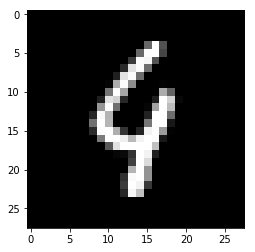

prediction: 9 true label: 4


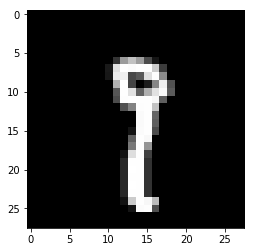

prediction: 8 true label: 9


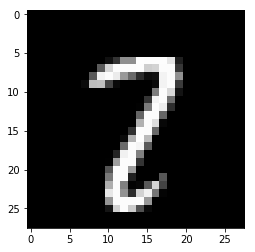

prediction: 7 true label: 2


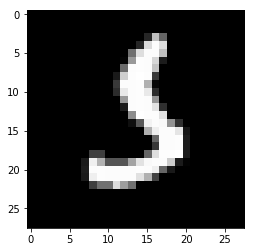

prediction: 3 true label: 5


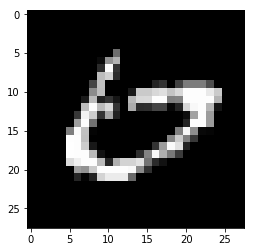

prediction: 0 true label: 6


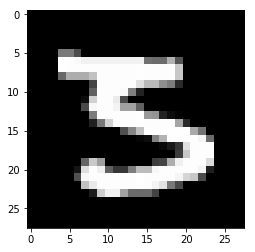

prediction: 5 true label: 3


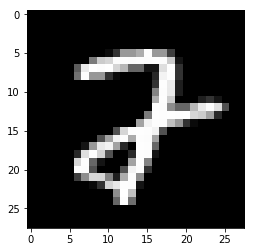

prediction: 7 true label: 2


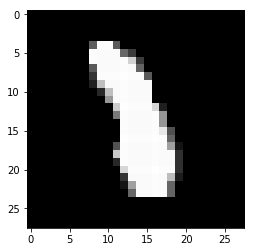

prediction: 8 true label: 1


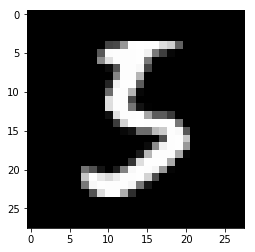

prediction: 3 true label: 5


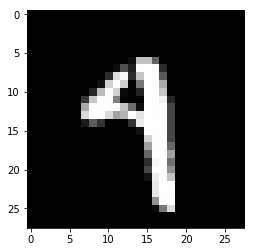

prediction: 9 true label: 4


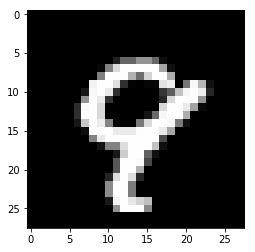

prediction: 8 true label: 9


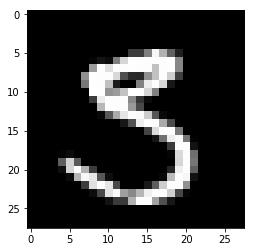

prediction: 5 true label: 3


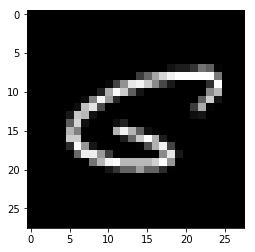

prediction: 5 true label: 6


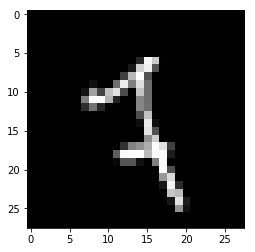

prediction: 3 true label: 7


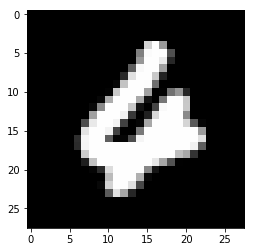

prediction: 6 true label: 4


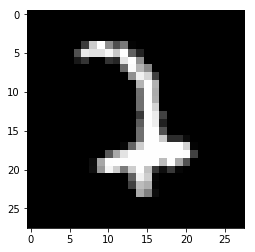

prediction: 2 true label: 7


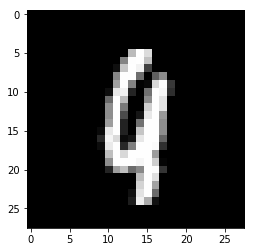

prediction: 4 true label: 9


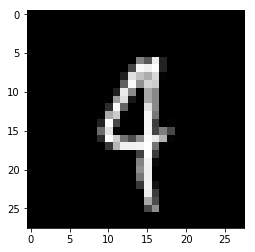

prediction: 9 true label: 4


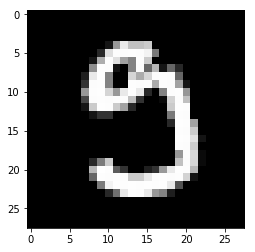

prediction: 5 true label: 9


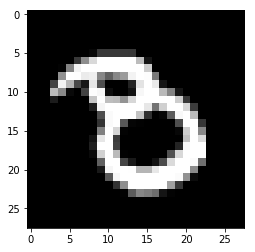

prediction: 3 true label: 8


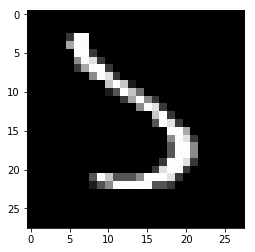

prediction: 3 true label: 5


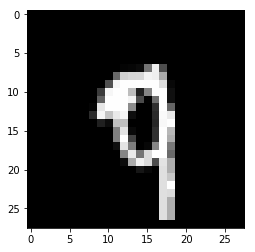

prediction: 7 true label: 9


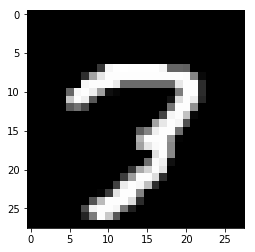

prediction: 7 true label: 3


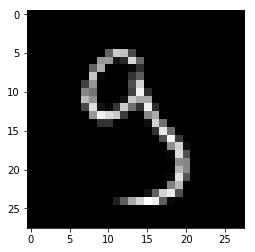

prediction: 3 true label: 9


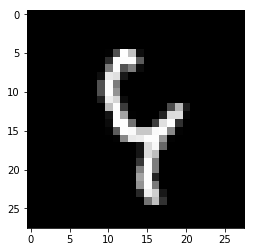

prediction: 4 true label: 9


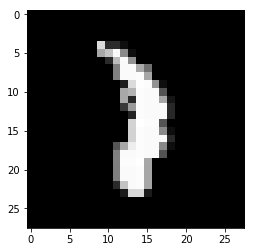

prediction: 8 true label: 1


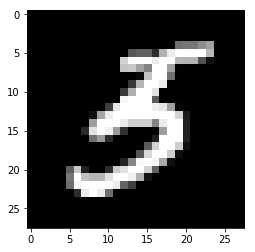

prediction: 3 true label: 5


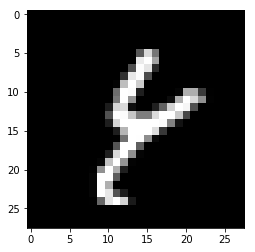

prediction: 8 true label: 4


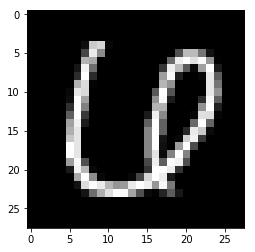

prediction: 0 true label: 6


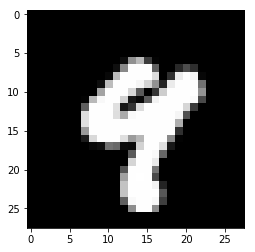

prediction: 9 true label: 4


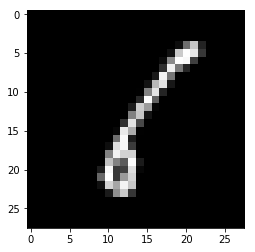

prediction: 1 true label: 6


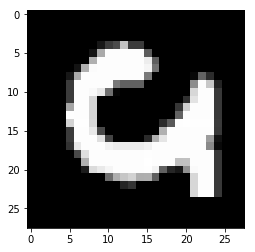

prediction: 0 true label: 9


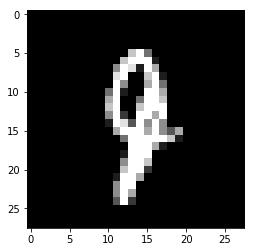

prediction: 8 true label: 9


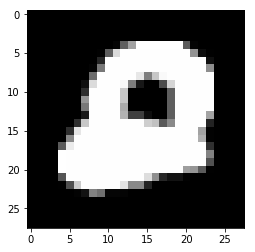

prediction: 0 true label: 2


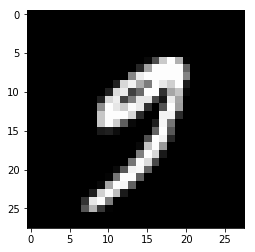

prediction: 7 true label: 9


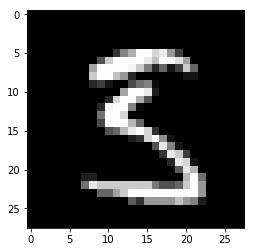

prediction: 3 true label: 5


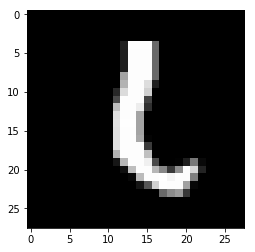

prediction: 1 true label: 6


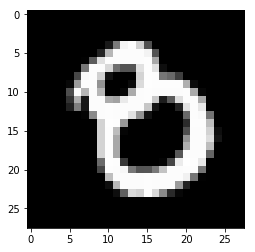

prediction: 0 true label: 8


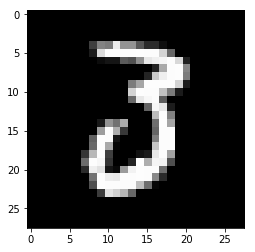

prediction: 8 true label: 3


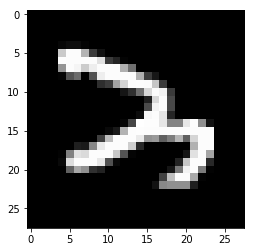

prediction: 2 true label: 3


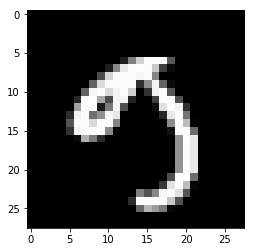

prediction: 5 true label: 9


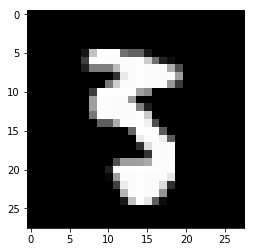

prediction: 5 true label: 3


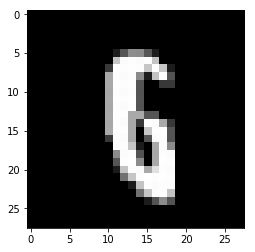

prediction: 8 true label: 6


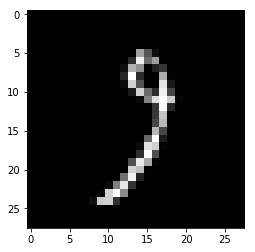

prediction: 7 true label: 9


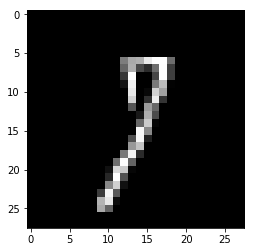

prediction: 9 true label: 7


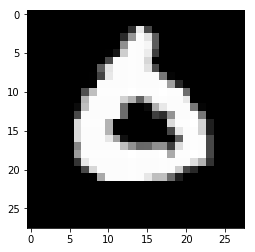

prediction: 0 true label: 6


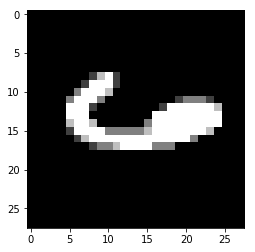

prediction: 4 true label: 6


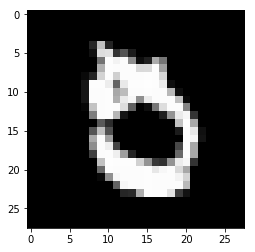

prediction: 0 true label: 5


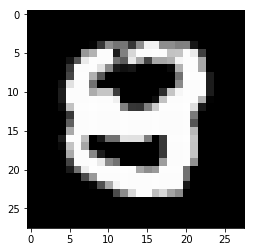

prediction: 9 true label: 8


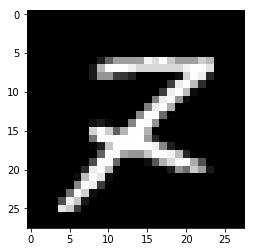

prediction: 2 true label: 7


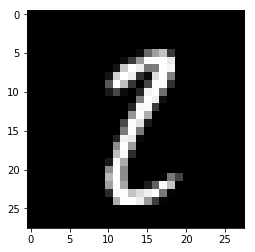

prediction: 8 true label: 2


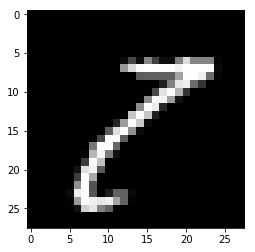

prediction: 8 true label: 7


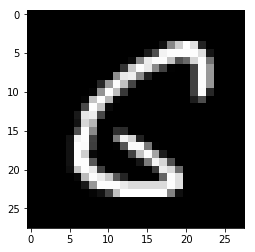

prediction: 8 true label: 6


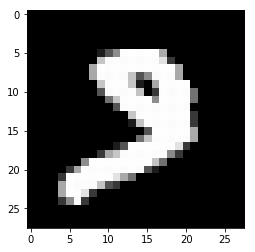

prediction: 8 true label: 9


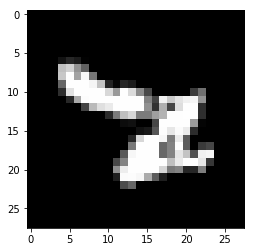

prediction: 7 true label: 2


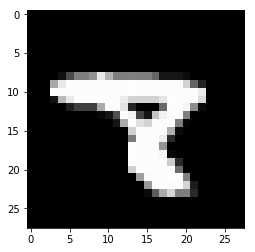

prediction: 7 true label: 8


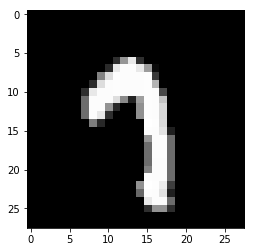

prediction: 9 true label: 7


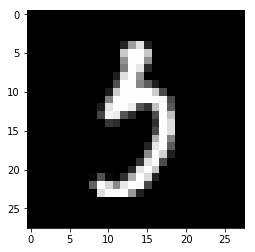

prediction: 5 true label: 3


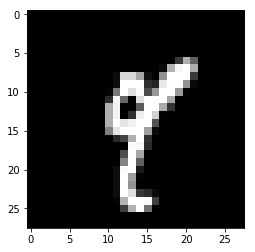

prediction: 8 true label: 9


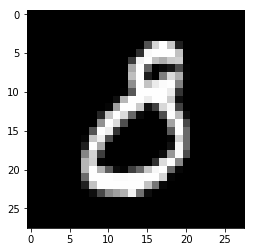

prediction: 0 true label: 8


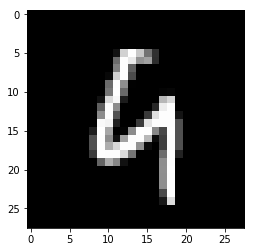

prediction: 4 true label: 9


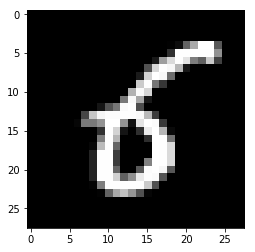

prediction: 5 true label: 6


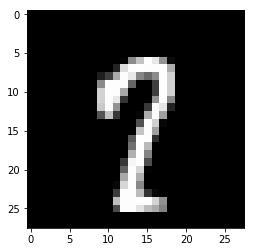

prediction: 2 true label: 7


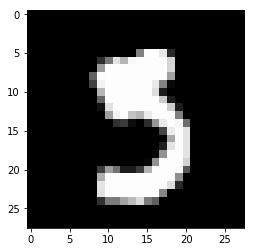

prediction: 3 true label: 5


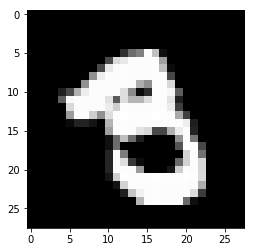

prediction: 8 true label: 3


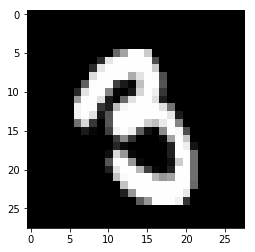

prediction: 8 true label: 3


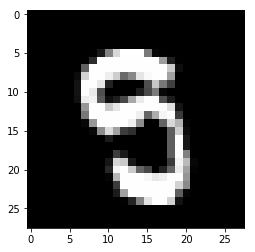

prediction: 9 true label: 5


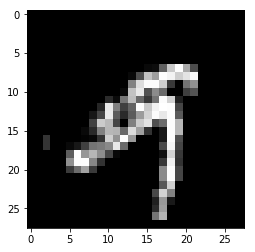

prediction: 5 true label: 9


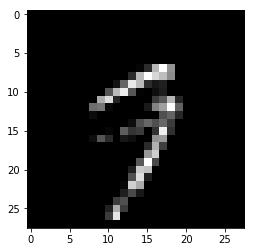

prediction: 7 true label: 9


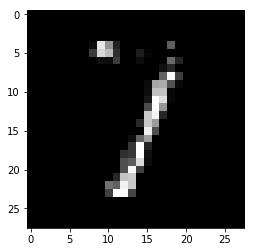

prediction: 1 true label: 7


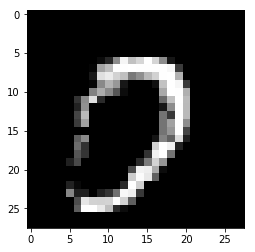

prediction: 7 true label: 0


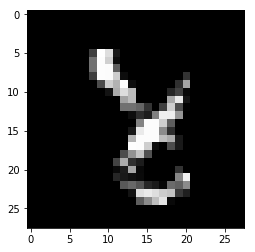

prediction: 2 true label: 8


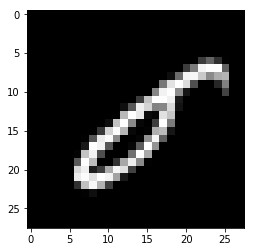

prediction: 8 true label: 0


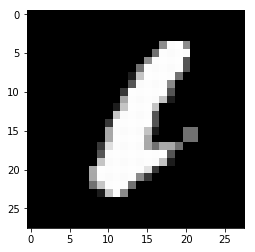

prediction: 6 true label: 1


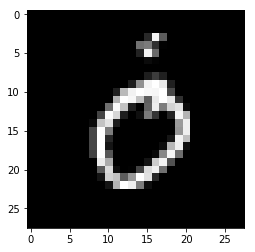

prediction: 6 true label: 0


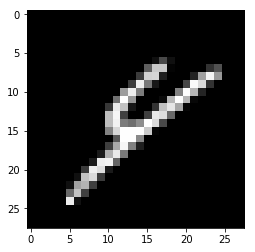

prediction: 8 true label: 4


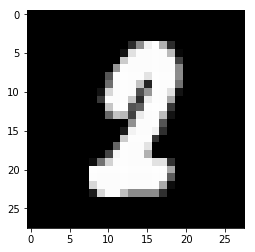

prediction: 8 true label: 2


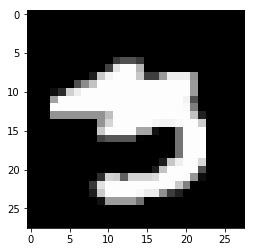

prediction: 9 true label: 3


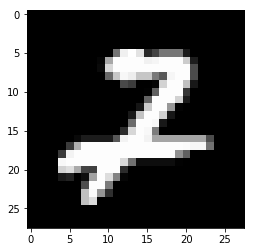

prediction: 2 true label: 7


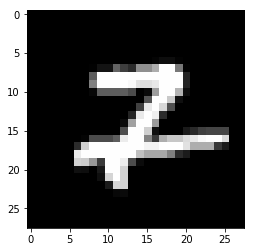

prediction: 2 true label: 7


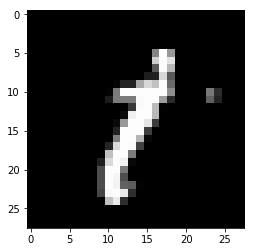

prediction: 8 true label: 1


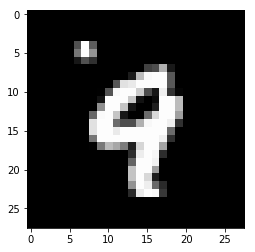

prediction: 4 true label: 9


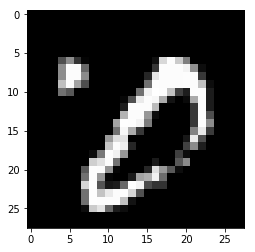

prediction: 1 true label: 0


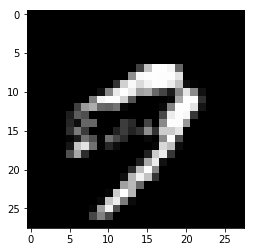

prediction: 7 true label: 9


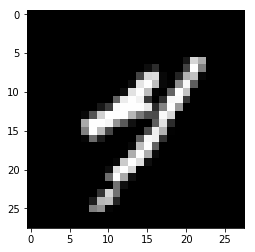

prediction: 7 true label: 4


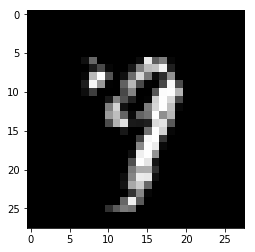

prediction: 7 true label: 9


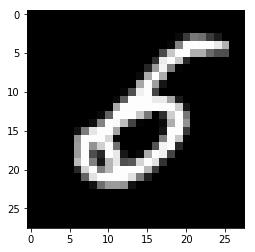

prediction: 6 true label: 5


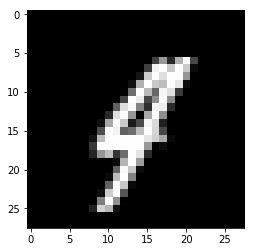

prediction: 9 true label: 4


In [19]:
import matplotlib.pyplot as plt
prediction = sess.run(y_conv, {x: mnist.test.images, keep_prob: 1.0})
true_label = mnist.test.labels
for i in range(10000):
    if prediction[i].argmax()!=true_label[i].argmax():
        plt.imshow(mnist.test.images[i].reshape(28, 28))
        plt.gray()
        plt.show()
        print('prediction:', prediction[i].argmax(), 'true label:', true_label[i].argmax())

## CNN for CIFAR-1042 classification

In [5]:
import cifar10, cifar10_input
import tensorflow as tf
import numpy as np
import time

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
max_steps = 5000
batch_size = 128
data_dir = './cifar10_data/cifar-10-batches-bin'

def variable_with_weight_loss(shape, stddev, wl):
    var = tf.Variable(tf.truncated_normal(shape, stddev=stddev), dtype=tf.float32)
    if wl is not None:
        weight_loss = tf.multiply(tf.nn.l2_loss(var), wl, name='weight_loss')
        tf.add_to_collection('losses', weight_loss)
    return var

def loss(logits, labels):
    labels = tf.cast(labels, tf.int64)
    # softmax + cross entropy
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels, name='cross_entropy_per_example')
    cross_entropy_mean = tf.reduce_mean(cross_entropy, name='cross_entropy')
    tf.add_to_collection('losses', cross_entropy_mean)
    return tf.add_n(tf.get_collection('losses'), name='total_loss')

In [7]:
images_train, labels_train = cifar10_input.distorted_inputs(data_dir=data_dir, batch_size=batch_size)
images_test, labels_test = cifar10_input.inputs(eval_data=True, data_dir=data_dir, batch_size=batch_size)

Filling queue with 20000 CIFAR images before starting to train. This will take a few minutes.


In [8]:
image_holder = tf.placeholder(tf.float32, [batch_size, 24, 24,3])
label_holder = tf.placeholder(tf.int32, [batch_size])

weight_1 = variable_with_weight_loss([5, 5, 3, 64], stddev=0.05, wl=0.0)
kernel_1 = tf.nn.conv2d(image_holder, weight_1, [1, 1, 1, 1], padding='SAME')
bias_1 = tf.Variable(tf.constant(0.0, shape=[64]))
conv_1 = tf.nn.relu(tf.nn.bias_add(kernel_1, bias_1))
pool_1 = tf.nn.max_pool(conv_1, ksize=[1, 3, 3, 1], strides=[1,2,2,1], padding='SAME')
norm_1 = tf.nn.lrn(pool_1, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75)

weight_2 = variable_with_weight_loss([5, 5, 64, 64], stddev=0.05, wl=0)
kernel_2 = tf.nn.conv2d(norm_1, weight_2, [1, 1, 1, 1], padding='SAME')
bias_2 = tf.Variable(tf.constant(0.1, shape=[64]))
conv_2 = tf.nn.relu(tf.nn.bias_add(kernel_2, bias_2))
norm_2 = tf.nn.lrn(conv_2, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75)
pool_2 = tf.nn.max_pool(norm_2, ksize=[1, 3, 3, 1], strides=[1,2,2,1], padding='SAME')

reshape = tf.reshape(pool_1, shape=[batch_size, -1])
dim = reshape.get_shape()[1].value
weight_3 = variable_with_weight_loss([dim, 384], stddev=0.04, wl= 0.004)
bias_3 = tf.Variable(tf.constant(0.1, shape=[384]))
local_3 = tf.nn.relu(tf.matmul(reshape, weight_3) + bias_3)

weight_4 = variable_with_weight_loss([384, 192], stddev=0.04, wl= 0.004)
bias_4 = tf.Variable(tf.constant(0.1, shape=[192]))
local_4 = tf.nn.relu(tf.matmul(local_3, weight_4) + bias_4)

weight_5 = variable_with_weight_loss([192, 10], stddev=1 / 192, wl= 0.0)
bias_5 = tf.Variable(tf.constant(0.1, shape=[10]))
logits = tf.nn.relu(tf.matmul(local_4, weight_5) + bias_5)

loss = loss(logits, label_holder)
train_op = tf.train.AdamOptimizer(1e-3).minimize(loss)
top_k_op = tf.nn.in_top_k(logits, label_holder, 1)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

tf.train.start_queue_runners()

[<Thread(QueueRunnerThread-input_producer-input_producer/input_producer_EnqueueMany, started daemon 123145394999296)>,
 <Thread(QueueRunnerThread-shuffle_batch/random_shuffle_queue-shuffle_batch/random_shuffle_queue_enqueue, started daemon 123145400254464)>,
 <Thread(QueueRunnerThread-shuffle_batch/random_shuffle_queue-shuffle_batch/random_shuffle_queue_enqueue, started daemon 123145405509632)>,
 <Thread(QueueRunnerThread-shuffle_batch/random_shuffle_queue-shuffle_batch/random_shuffle_queue_enqueue, started daemon 123145410764800)>,
 <Thread(QueueRunnerThread-shuffle_batch/random_shuffle_queue-shuffle_batch/random_shuffle_queue_enqueue, started daemon 123145416019968)>,
 <Thread(QueueRunnerThread-shuffle_batch/random_shuffle_queue-shuffle_batch/random_shuffle_queue_enqueue, started daemon 123145421275136)>,
 <Thread(QueueRunnerThread-shuffle_batch/random_shuffle_queue-shuffle_batch/random_shuffle_queue_enqueue, started daemon 123145426530304)>,
 <Thread(QueueRunnerThread-shuffle_batch/

In [9]:
for step in range(max_steps):
    start_time = time.time()
    image_batch, label_batch = sess.run([images_train, labels_train])
    _, loss_value = sess.run([train_op, loss], feed_dict={image_holder: image_batch, label_holder: label_batch})
    duration = time.time() - start_time
    
    if step % 10 == 0:
        examples_per_sec = batch_size / duration
        sec_per_batch = float(duration)
        
        format_str = ('step %d, loss %.2f (%.1f examples/sec; %.3f sec/batch)')
        print(format(format_str % (step, loss_value, examples_per_sec, sec_per_batch)))

step 0, loss 11.26 (789.0 examples/sec; 0.162 sec/batch)
step 10, loss 7.82 (1095.3 examples/sec; 0.117 sec/batch)
step 20, loss 5.62 (1097.7 examples/sec; 0.117 sec/batch)
step 30, loss 4.29 (1105.6 examples/sec; 0.116 sec/batch)
step 40, loss 3.45 (1123.0 examples/sec; 0.114 sec/batch)
step 50, loss 2.92 (1118.9 examples/sec; 0.114 sec/batch)
step 60, loss 2.67 (1147.9 examples/sec; 0.112 sec/batch)
step 70, loss 2.53 (1070.1 examples/sec; 0.120 sec/batch)
step 80, loss 2.22 (1098.8 examples/sec; 0.116 sec/batch)
step 90, loss 2.17 (1096.0 examples/sec; 0.117 sec/batch)
step 100, loss 2.26 (1083.2 examples/sec; 0.118 sec/batch)
step 110, loss 2.36 (1104.4 examples/sec; 0.116 sec/batch)
step 120, loss 2.25 (1160.2 examples/sec; 0.110 sec/batch)
step 130, loss 2.21 (1016.7 examples/sec; 0.126 sec/batch)
step 140, loss 1.99 (1103.9 examples/sec; 0.116 sec/batch)
step 150, loss 2.10 (1117.4 examples/sec; 0.115 sec/batch)
step 160, loss 2.11 (1098.2 examples/sec; 0.117 sec/batch)
step 170

step 1390, loss 1.72 (1126.4 examples/sec; 0.114 sec/batch)
step 1400, loss 1.82 (1124.8 examples/sec; 0.114 sec/batch)
step 1410, loss 1.81 (1016.8 examples/sec; 0.126 sec/batch)
step 1420, loss 1.71 (1093.4 examples/sec; 0.117 sec/batch)
step 1430, loss 1.71 (1123.7 examples/sec; 0.114 sec/batch)
step 1440, loss 1.63 (1077.9 examples/sec; 0.119 sec/batch)
step 1450, loss 1.69 (1138.2 examples/sec; 0.112 sec/batch)
step 1460, loss 1.76 (1136.5 examples/sec; 0.113 sec/batch)
step 1470, loss 1.73 (1113.5 examples/sec; 0.115 sec/batch)
step 1480, loss 1.72 (1117.7 examples/sec; 0.115 sec/batch)
step 1490, loss 1.73 (1151.6 examples/sec; 0.111 sec/batch)
step 1500, loss 1.70 (1139.9 examples/sec; 0.112 sec/batch)
step 1510, loss 1.72 (1103.6 examples/sec; 0.116 sec/batch)
step 1520, loss 1.77 (1125.7 examples/sec; 0.114 sec/batch)
step 1530, loss 1.77 (1120.0 examples/sec; 0.114 sec/batch)
step 1540, loss 1.80 (1138.3 examples/sec; 0.112 sec/batch)
step 1550, loss 1.64 (1140.8 examples/se

step 2760, loss 1.57 (1100.3 examples/sec; 0.116 sec/batch)
step 2770, loss 1.86 (1132.3 examples/sec; 0.113 sec/batch)
step 2780, loss 1.81 (1128.6 examples/sec; 0.113 sec/batch)
step 2790, loss 1.60 (1170.7 examples/sec; 0.109 sec/batch)
step 2800, loss 1.80 (1111.8 examples/sec; 0.115 sec/batch)
step 2810, loss 1.64 (1144.3 examples/sec; 0.112 sec/batch)
step 2820, loss 1.64 (1118.9 examples/sec; 0.114 sec/batch)
step 2830, loss 1.62 (1146.7 examples/sec; 0.112 sec/batch)
step 2840, loss 1.65 (1117.1 examples/sec; 0.115 sec/batch)
step 2850, loss 1.71 (1080.4 examples/sec; 0.118 sec/batch)
step 2860, loss 1.66 (1121.7 examples/sec; 0.114 sec/batch)
step 2870, loss 1.73 (1124.6 examples/sec; 0.114 sec/batch)
step 2880, loss 1.68 (1155.4 examples/sec; 0.111 sec/batch)
step 2890, loss 1.50 (1148.4 examples/sec; 0.111 sec/batch)
step 2900, loss 1.75 (1126.7 examples/sec; 0.114 sec/batch)
step 2910, loss 1.64 (1119.9 examples/sec; 0.114 sec/batch)
step 2920, loss 1.62 (1093.0 examples/se

step 4130, loss 1.62 (1157.6 examples/sec; 0.111 sec/batch)
step 4140, loss 1.61 (1113.5 examples/sec; 0.115 sec/batch)
step 4150, loss 1.72 (1112.4 examples/sec; 0.115 sec/batch)
step 4160, loss 1.57 (1097.4 examples/sec; 0.117 sec/batch)
step 4170, loss 1.66 (1105.3 examples/sec; 0.116 sec/batch)
step 4180, loss 1.57 (1107.0 examples/sec; 0.116 sec/batch)
step 4190, loss 1.61 (1073.0 examples/sec; 0.119 sec/batch)
step 4200, loss 1.42 (1134.6 examples/sec; 0.113 sec/batch)
step 4210, loss 1.69 (1157.0 examples/sec; 0.111 sec/batch)
step 4220, loss 1.75 (1188.1 examples/sec; 0.108 sec/batch)
step 4230, loss 1.69 (1139.1 examples/sec; 0.112 sec/batch)
step 4240, loss 1.70 (1149.8 examples/sec; 0.111 sec/batch)
step 4250, loss 1.50 (1153.6 examples/sec; 0.111 sec/batch)
step 4260, loss 1.73 (1155.5 examples/sec; 0.111 sec/batch)
step 4270, loss 1.64 (1088.5 examples/sec; 0.118 sec/batch)
step 4280, loss 1.69 (1133.7 examples/sec; 0.113 sec/batch)
step 4290, loss 1.73 (1108.0 examples/se

In [13]:
num_examples = 10000
import math
num_iter = int(math.ceil(num_examples / batch_size))
true_count = 0
total_sample_count = num_iter * batch_size
i = 0
while i < num_iter:
    image_batch, label_batch = sess.run([images_test, labels_test])
    prediction = sess.run([top_k_op], feed_dict={image_holder: image_batch, label_holder: label_batch})
    true_count += np.sum(prediction)
    i += 1
#     print(prediction)
    
precision = true_count / total_sample_count
print('precision @ 1 = %.3f' % precision)

precision @ 1 = 0.551
